# Gradient boosting

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model  import LogisticRegression
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from xgboost               import XGBClassifier, plot_tree
from lightgbm              import LGBMClassifier

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics         import accuracy_score, balanced_accuracy_score
from IPython.display import clear_output

# Leer CSV

In [6]:
!wget -P ./../data/ https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_II/adult.csv

--2023-11-03 14:28:12--  https://raw.githubusercontent.com/pbonillor/DATA_SCIENCE_CON_PYTHON/main/MODULO_II/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5277526 (5.0M) [text/plain]
Saving to: ‘./../data/adult.csv.1’

adult.csv.1         100%[===================>]   5.03M  --.-KB/s    in 0.05s   

2023-11-03 14:28:12 (96.7 MB/s) - ‘./../data/adult.csv.1’ saved [5277526/5277526]



In [7]:
df = pd.read_csv("../data/adult.csv")

In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Qué queremos predecir? -> `df.income`

In [10]:
df.income

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

# Variables

In [11]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object]).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)


Numerical features:
 ['age' 'fnlwgt' 'educational-num' 'capital-gain' 'capital-loss'
 'hours-per-week']

Categorical features:
 ['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'gender' 'native-country' 'income']


# Categorical

In [12]:
df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


# Models

In [13]:
x = df.drop("income", axis="columns")
y = df["income"]

In [15]:
models = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1)),
    ('Decision Tree',       DecisionTreeClassifier()),
    ('Extra Trees 100',         ExtraTreesClassifier(n_jobs=-1)),
    ('Random Forest 100',       RandomForestClassifier(n_jobs=-1)),
    ('Gradient Boosting 100',   GradientBoostingClassifier()),
    ('XGBoost 100',             XGBClassifier(n_estimators=100)),
    ('LightGBM 100',            LGBMClassifier(n_estimators=100)),
    #('XGBoost 250',             XGBClassifier(n_estimators=250))
]

results = pd.DataFrame(columns=["Accuracy", "Bal Acc"])

for model_name, model in models:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    pred_oof     = cross_val_predict(model, x, y, cv=skf)
    predProb_oof = cross_val_predict(model, x, y, cv=skf, method="predict_proba")
    #cv_r = cross_val_score(model, x, y, cv=skf, scoring='accuracy')

    acc     = accuracy_score(y, pred_oof)*100
    bal_acc = balanced_accuracy_score(y, pred_oof)*100

    results.loc[model_name] = [acc, bal_acc]
    clear_output(wait=True)
    display(results.style.bar(subset=["Accuracy", "Bal Acc"], vmin=0, vmax=100, color='#5fba7d'))

    #print("%s: %.2f%%" % (model_name, balanced_accuracy_score(y, pred_oof)*100))
    #print("%s: %.2f%% (%.2f%%)" % (model_name, cv_r.mean()*100, cv_r.std()*100))

,Accuracy,Bal Acc
Logistic Regression,79.255559,61.893147
Decision Tree,80.989722,74.358452
Extra Trees 100,84.435527,76.479594
Random Forest 100,85.623029,77.368612
Gradient Boosting 100,86.648786,77.468036
XGBoost 100,87.236395,79.883576
LightGBM 100,87.451374,79.898777


In [16]:
results.style.bar(subset=["Accuracy", "Bal Acc"], vmin=50, vmax=100, color='#5fba7d')

,Accuracy,Bal Acc
Logistic Regression,79.255559,61.893147
Decision Tree,80.989722,74.358452
Extra Trees 100,84.435527,76.479594
Random Forest 100,85.623029,77.368612
Gradient Boosting 100,86.648786,77.468036
XGBoost 100,87.236395,79.883576
LightGBM 100,87.451374,79.898777


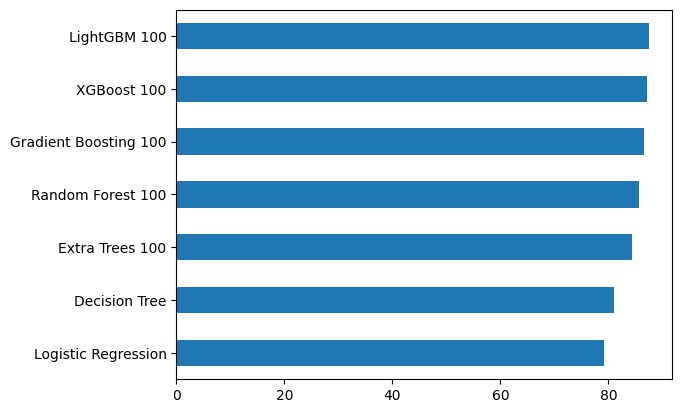

In [17]:
results.Accuracy.sort_values().plot.barh();

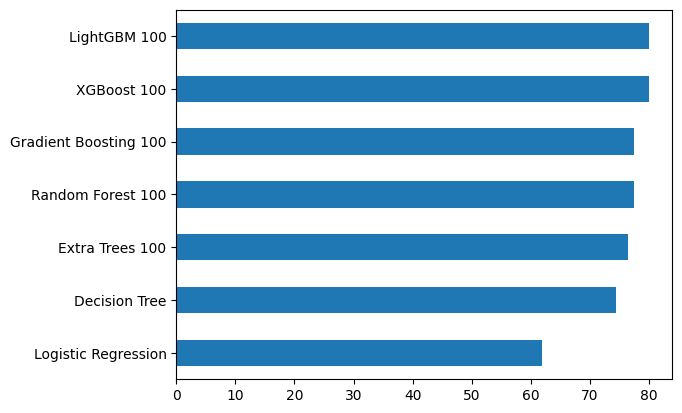

In [18]:
results["Bal Acc"].sort_values().plot.barh();